In [4]:
import matplotlib.pyplot as plt
font = {'size' : 14}
import matplotlib
matplotlib.rc('font', **font)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns


 **Lectura y revisión de datos - Ingresos Fijos**

*EDA Y ETL*

In [5]:
df_ingresos_fijos=pd.read_csv('Internet_Ingresos_fijos.csv')
df_ingresos_fijos.head ()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,72,Oct-Dic 2022
1,2022,3,64,Jul-Sept 2022
2,2022,2,60,Abr-Jun 2022
3,2022,1,55,Ene-Mar 2022
4,2021,4,45,Oct-Dic 2021


In [6]:
df_ingresos_fijos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        36 non-null     int64 
 1   Trimestre                  36 non-null     int64 
 2   Ingresos (miles de pesos)  36 non-null     int64 
 3   Periodo                    36 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.3+ KB


In [7]:
# Conversión de tipo de datos
df_ingresos_fijos['Año']=df_ingresos_fijos['Año'].astype('int')
df_ingresos_fijos['Trimestre']=df_ingresos_fijos['Trimestre'].astype('int')
df_ingresos_fijos['Ingresos (miles de pesos)']=df_ingresos_fijos['Ingresos (miles de pesos)'].astype('int')
df_ingresos_fijos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        36 non-null     int32 
 1   Trimestre                  36 non-null     int32 
 2   Ingresos (miles de pesos)  36 non-null     int32 
 3   Periodo                    36 non-null     object
dtypes: int32(3), object(1)
memory usage: 852.0+ bytes


In [8]:
# Cambio nombre en columnas
df_ingresos_fijos=df_ingresos_fijos.rename(columns={'Año':'Anio' ,'Ingresos (miles de pesos)':'Ingresos'})
df_ingresos_fijos.sample(3)

,Anio,Trimestre,Ingresos,Periodo
32,2014,4,4,Oct-Dic 2014
16,2018,4,17,Oct-Dic 2018
18,2018,2,14,Abr-Jun 2018


In [9]:
# Verificar si hay valores nulos en todo el DataFrame
valores_nulos = df_ingresos_fijos.isnull().any().any()

if valores_nulos:
    print("¡Hay valores nulos en el DataFrame!")
    # Muestra la cantidad de valores nulos por columna
    print(df_ingresos_fijos.isnull().sum())
else:
    print("No hay valores nulos en el DataFrame.")

No hay valores nulos en el DataFrame.


In [10]:
## ¿Cuál es el periodo con mejores ingresos?##

# Separar la columna 'periodo' en 'mes' y 'anio'
df_ingresos_fijos[['mes', 'anio']] = df_ingresos_fijos['Periodo'].str.split(' ', expand=True)

# Encontrar el período con los mejores ingresos
fila_max_ingreso = df_ingresos_fijos.loc[df_ingresos_fijos['Ingresos'].idxmax()]

print("El período con los mejores ingresos es:")
print(fila_max_ingreso)

El período con los mejores ingresos es:
Anio                 2022
Trimestre               4
Ingresos               72
Periodo      Oct-Dic 2022
mes               Oct-Dic
anio                 2022
Name: 0, dtype: object


In [11]:
 ## Periodo con menores ingresos ##

df_ingresos_fijos[['mes', 'anio']] = df_ingresos_fijos['Periodo'].str.split(' ', expand=True)

# Encontrar el período con los ingresos más bajos
fila_min_ingreso = df_ingresos_fijos.loc[df_ingresos_fijos['Ingresos'].idxmin()]

print("El período con los ingresos más bajos es:")
print(fila_min_ingreso)

El período con los ingresos más bajos es:
Anio                  2014
Trimestre                3
Ingresos                 3
Periodo      Jul-Sept 2014
mes               Jul-Sept
anio                  2014
Name: 33, dtype: object


 **Lectura y revisión de datos - Internet Penetración fijo**

 *EDA Y ETL*

In [12]:
df_ipf=pd.read_csv('Internet_Penetracion_fijo.csv')
df_ipf.head (10)

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,4,"77,21","24,15",Oct-Dic 2022
1,2022,3,"76,64","23,95",Jul-Sept 2022
2,2022,2,"75,97","23,72",Abr-Jun 2022
3,2022,1,"73,88","23,05",Ene-Mar 2022
4,2021,4,"73,18","22,81",Oct-Dic 2021
5,2021,3,"70,58","21,98",Jul-Sept 2021
6,2021,2,"69,24","21,55",Abr-Jun 2021
7,2021,1,"67,95","21,13",Ene-Mar 2021
8,2020,4,"67,62","21,01",Oct-Dic 2020
9,2020,3,"66,31","20,59",Jul-Sept 2020


In [13]:
df_ipf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           36 non-null     int64 
 1   Trimestre                     36 non-null     int64 
 2   Accesos por cada 100 hogares  36 non-null     object
 3   Accesos por cada 100 hab      36 non-null     object
 4   Periodo                       36 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [14]:
# Elimino los NaN
df_ipf.dropna(inplace=True)

In [15]:
# Cambio nombre en columnas
df_ipf=df_ipf.rename(columns={'Accesos por cada 100 hogares':'Accesos por 100 hogares' ,'Accesos por cada 100 hab':'Accesos por 100 hab'})
df_ipf.sample(3)

,Año,Trimestre,Accesos por 100 hogares,Accesos por 100 hab,Periodo
1,2022,3,"76,64","23,95",Jul-Sept 2022
33,2014,3,"50,67","15,43",Jul-Sept 2014
6,2021,2,"69,24","21,55",Abr-Jun 2021


In [16]:
df_ipf.describe()

,Año,Trimestre
count,36.000000,36.000000
mean,2018.000000,2.500000
std,2.618615,1.133893
min,2014.000000,1.000000
25%,2016.000000,1.750000
50%,2018.000000,2.500000
75%,2020.000000,3.250000
max,2022.000000,4.000000


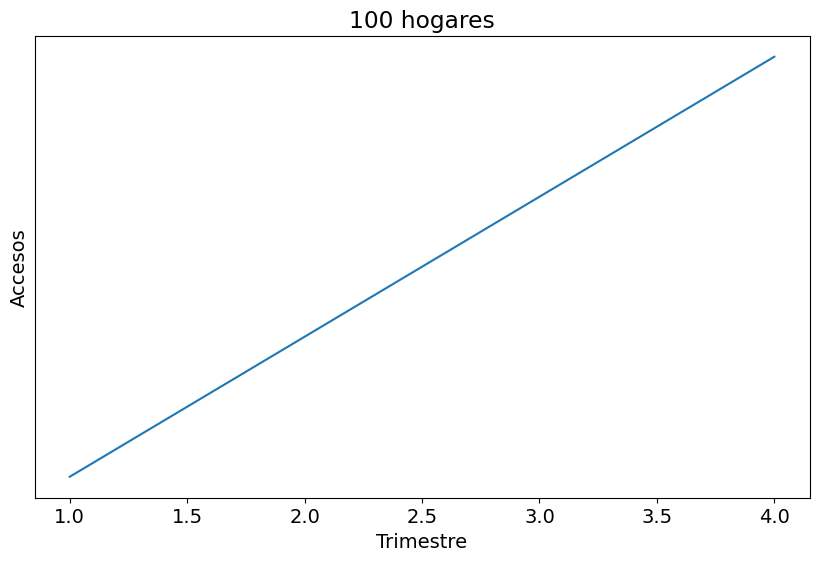

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Trimestre', y='Accesos por 100 hogares', data=df_ipf, estimator='sum', errorbar=None)
plt.xlabel('Trimestre')
plt.ylabel('Accesos')
plt.title('100 hogares')
plt.show()

**Lectura y revisión de datos - Internet Penetración cada 100**

*EDA Y ETL*

In [18]:
df_ip100=pd.read_csv('Internet_Penetracion_cada100.csv')
df_ip100.head(15)

,Unnamed: 0,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,0,2022,4,Buenos Aires,"78,94"
1,1,2022,4,Capital Federal,"122,73"
2,2,2022,4,Catamarca,"65,77"
3,3,2022,4,Chaco,"43,62"
4,4,2022,4,Chubut,"85,57"
5,5,2022,4,Córdoba,"89,03"
6,6,2022,4,Corrientes,"51,64"
7,7,2022,4,Entre Ríos,"64,01"
8,8,2022,4,Formosa,"39,41"
9,9,2022,4,Jujuy,"58,46"


In [19]:
df_ip100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    864 non-null    int64 
 1   Año                           864 non-null    int64 
 2   Trimestre                     864 non-null    int64 
 3   Provincia                     864 non-null    object
 4   Accesos por cada 100 hogares  864 non-null    object
dtypes: int64(3), object(2)
memory usage: 33.9+ KB


In [20]:
# Verificar si hay valores nulos en todo el DataFrame
valores_nulos=df_ip100.isnull().any().any()

if valores_nulos:
    print("¡Hay valores nulos en el DataFrame!")
    # Muestra la cantidad de valores nulos por columna
    print(df_ip100.isnull().sum())
else:
    print("No hay valores nulos en el DataFrame.")

No hay valores nulos en el DataFrame.


In [21]:
# Eliminar columnas con valores nulos
df_ip100_sin_columnas_nulas=df_ip100.dropna(axis=1, how='all')

# Mostrar el DataFrame resultante sin las columnas que contenían valores nulos
df_ip100_sin_columnas_nulas.head(10)

,Unnamed: 0,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,0,2022,4,Buenos Aires,"78,94"
1,1,2022,4,Capital Federal,"122,73"
2,2,2022,4,Catamarca,"65,77"
3,3,2022,4,Chaco,"43,62"
4,4,2022,4,Chubut,"85,57"
5,5,2022,4,Córdoba,"89,03"
6,6,2022,4,Corrientes,"51,64"
7,7,2022,4,Entre Ríos,"64,01"
8,8,2022,4,Formosa,"39,41"
9,9,2022,4,Jujuy,"58,46"


In [22]:
 # ¿Cuál es la descripción estadística de las variables numéricas en el DataFrame?
df_ip100_sin_columnas_nulas.describe()

,Unnamed: 0,Año,Trimestre
count,864.000000,864.000000,864.000000
mean,431.500000,2018.000000,2.500000
std,249.559612,2.583484,1.118682
min,0.000000,2014.000000,1.000000
25%,215.750000,2016.000000,1.750000
50%,431.500000,2018.000000,2.500000
75%,647.250000,2020.000000,3.250000
max,863.000000,2022.000000,4.000000


In [23]:
# Guardar el DataFrame con los accesos cada 100 hogares para su posterior análisis de KPIs
df_ip100_sin_columnas_nulas.to_csv('Internet_Penetracion_cada100_nuevo.csv')

**Lectura y revisión de datos - Internet BAF (Banda ancha fija)**

*EDA Y ETL*

In [24]:
df_2=pd.read_csv('Internet_BAF.csv')
df_2.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,5,6.0,5
1,2022,4,Capital Federal,2,2.0,2
2,2022,4,Catamarca,71,1.0,71
3,2022,4,Chaco,144,5.0,144
4,2022,4,Chubut,168,904.0,169


In [25]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               864 non-null    int64  
 1   Trimestre         864 non-null    int64  
 2   Provincia         864 non-null    object 
 3   Banda ancha fija  864 non-null    int64  
 4   Dial up           862 non-null    float64
 5   Total             864 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 40.6+ KB


In [26]:
hay_duplicados = df_2.duplicated().any()
# Mostrar el resultado
print("¿Hay datos duplicados?:", hay_duplicados)

¿Hay datos duplicados?: False


In [27]:
# Verificar si hay valores nulos en todo el DataFrame
valores_nulos = df_2.isnull().any().any()

if valores_nulos:
    print("¡Hay valores nulos en el DataFrame!")
    # Muestra la cantidad de valores nulos por columna
    print(df_2.isnull().sum())
else:
    print("No hay valores nulos en el DataFrame.")

¡Hay valores nulos en el DataFrame!
Año                 0
Trimestre           0
Provincia           0
Banda ancha fija    0
Dial up             2
Total               0
dtype: int64


In [28]:
# Elimino los NaN
df_2.dropna(inplace=True)

In [29]:
#¿Cuál es la descripción estadística de las variables numéricas en el DataFrame?
df_2.describe()

,Año,Trimestre,Banda ancha fija,Dial up,Total
count,862.000000,862.00000,862.000000,862.000000,862.000000
mean,2018.000000,2.50116,137.469838,150.595128,137.780742
std,2.586483,1.11972,180.991593,230.167337,180.977875
min,2014.000000,1.00000,1.000000,0.000000,1.000000
25%,2016.000000,1.25000,39.000000,2.000000,39.250000
50%,2018.000000,3.00000,90.500000,16.000000,91.000000
75%,2020.000000,3.75000,143.000000,253.500000,143.750000
max,2022.000000,4.00000,987.000000,998.000000,987.000000


In [30]:
# ¿Cuál es la distribución de la cantidad de conexiones de banda ancha fija en el DataFrame?
df_2['Banda ancha fija'].value_counts()

Banda ancha fija
1      34
26     19
3      18
62     17
51     15
       ..
163     1
217     1
778     1
201     1
506     1
Name: count, Length: 268, dtype: int64

<Axes: ylabel='Dial up'>

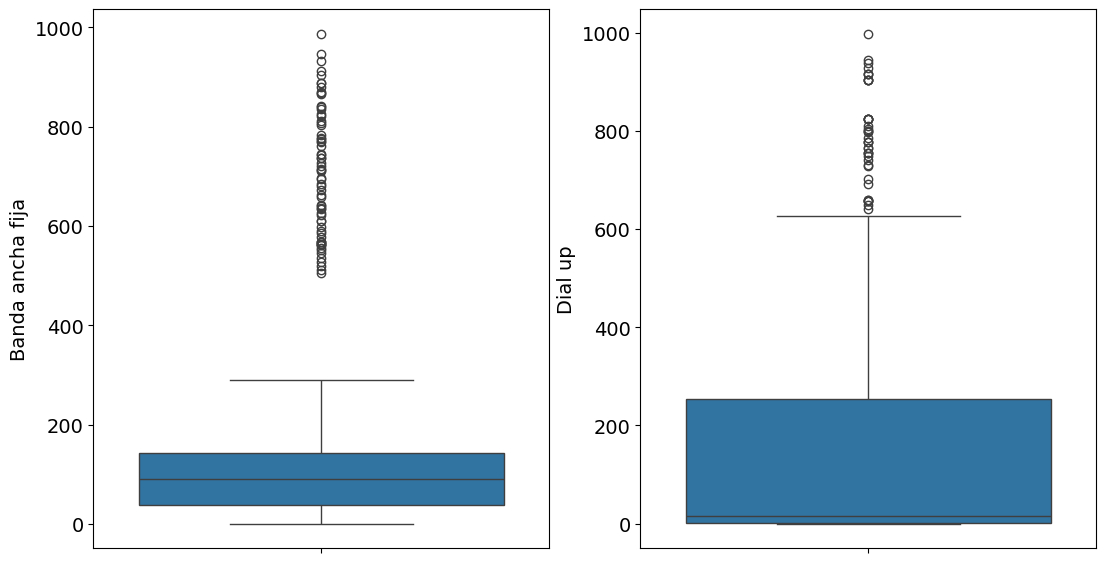

In [31]:
#Comparativa entre Banda ancha fija y Dial up
fig=plt.figure(figsize=(20,7))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)

sns.boxplot(data=df_2,y='Banda ancha fija',ax=ax1)
sns.boxplot(data=df_2,y='Dial up',ax=ax2)

In [32]:
#¿Cuál es la media de la variable 'Dial up' para cada provincia?
pd.pivot_table(df_2,index='Provincia',values='Dial up',aggfunc='mean')

,Dial up
Provincia,
Buenos Aires,9.611111
Capital Federal,5.722222
Catamarca,9.111111
Chaco,13.138889
Chubut,310.111111
Corrientes,14.333333
Córdoba,129.555556
Entre Ríos,71.972222
Formosa,10.057143


In [33]:
#¿Cuál es la media de la variable 'Banda ancha fija' para cada provincia?
pd.pivot_table(df_2,index='Provincia',values='Banda ancha fija',aggfunc='mean')

,Banda ancha fija
Provincia,
Buenos Aires,3.638889
Capital Federal,1.166667
Catamarca,38.388889
Chaco,106.250000
Chubut,97.083333
Corrientes,103.694444
Córdoba,644.444444
Entre Ríos,208.861111
Formosa,40.428571


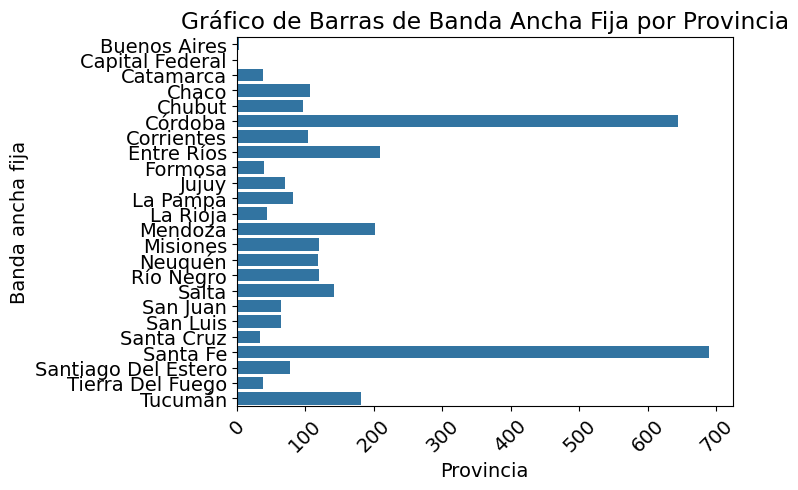

In [34]:
# ¿Cómo varía el rendimiento de banda ancha fija por provincia?
sns.barplot(data=df_2, x='Banda ancha fija', y='Provincia', ci=None)

# Ajustes adicionales para mejorar la visualización
plt.xticks(rotation=45) 
plt.title('Gráfico de Barras de Banda Ancha Fija por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Banda ancha fija')
plt.show()


In [35]:
#¿Cuál es la media de la variable 'Banda ancha fija' para cada provincia y año?

Tabla_p=pd.pivot_table(df_2,index='Provincia',values='Banda ancha fija',columns='Año',aggfunc=['mean'])
Tabla_p

mean                                              \
Año                    2014    2015    2016    2017        2018    2019   
Provincia                                                                 
Buenos Aires           3.00    3.00    3.00    3.00    3.500000    4.00   
Capital Federal        1.00    1.00    1.00    1.75    1.000000    1.00   
Catamarca             24.75   25.75   26.75   29.00   34.000000   34.50   
Chaco                 64.00   84.25   88.25   92.75  100.250000  111.25   
Chubut                67.75   62.25   62.00   74.00   93.000000   86.50   
Corrientes            63.75   83.50   87.25   91.50   98.000000  110.25   
Córdoba              579.75  614.00  630.75  676.50  722.500000  777.25   
Entre Ríos           136.75  170.25  178.50  185.50  206.000000  236.25   
Formosa               25.75   27.50   28.75   31.00   40.666667   46.00   
Jujuy                 34.50   38.75   41.75   43.25   56.000000   88.25   
La Pampa              57.00   64.25   68.50   76.25   83.250000   90.00   
La Rioja              16.00   16.50   16.75   34.00   52.000000   50.25   
Mendoza              165.75  168.75  169.00  177.00  202.250000  209.00   
Misiones              75.25   89.75   96.00  100.50  109.333333  131.50   
Neuquén               92.75   98.00  108.00  114.25  114.250000  118.00   
Río Negro             95.25   98.00   99.75  104.00  112.250000  132.00   
Salta                 92.50   99.50  105.50  120.75  133.750000  150.75   
San Juan              51.00   51.00   51.00   55.50   63.000000   67.25   
San Luis              12.75   13.00   13.00   15.50   53.000000  110.75   
Santa Cruz            26.00   25.75   26.00   28.50   31.500000   33.00   
Santa Fe             516.50  549.75  560.75  616.00  694.750000  752.50   
Santiago Del Estero   38.00   39.00   36.50   54.75   85.500000  113.50   
Tierra Del Fuego      27.50   32.00   31.00   30.75   41.500000   45.25   
Tucumán              132.75  142.25  149.75  157.50  170.250000  175.25   

                                             
Año                    2020    2021    2022  
Provincia                                    
Buenos Aires           4.00    4.25    5.00  
Capital Federal        1.00    1.00    1.75  
Catamarca             47.50   55.75   67.50  
Chaco                130.25  141.25  144.00  
Chubut               115.75  146.00  166.50  
Corrientes           120.50  131.50  147.00  
Córdoba              854.25  944.00    1.00  
Entre Ríos           238.50  258.75  269.25  
Formosa               48.25   52.50   63.50  
Jujuy                 99.75  111.75  117.25  
La Pampa              92.50  100.50  112.75  
La Rioja              51.50   75.00   85.75  
Mendoza              201.50  242.25  283.25  
Misiones             141.00  158.75  179.75  
Neuquén              127.25  139.25  158.50  
Río Negro            131.75  145.50  159.50  
Salta                179.00  193.75  203.00  
San Juan              70.75   79.00   98.75  
San Luis             114.75  119.75  124.75  
Santa Cruz            39.25   48.00   49.25  
Santa Fe             793.25  843.25  881.25  
Santiago Del Estero  105.00  114.25  118.00  
Tierra Del Fuego      39.00   44.25   53.50  
Tucumán              218.00  234.00  256.50

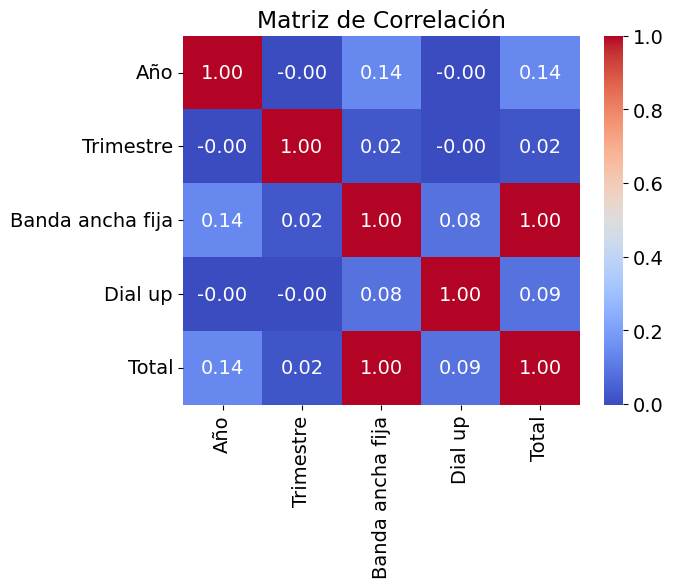

In [36]:
# Análisis de Correlación #

# Selección de las columnas numéricas para el cálculo de correlación
df_numeric = df_2.select_dtypes(include=['float64', 'int64'])

# Calculo la matriz de correlación
correlation_matrix = df_numeric.corr()

# Visualización de la matriz de correlación como un mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


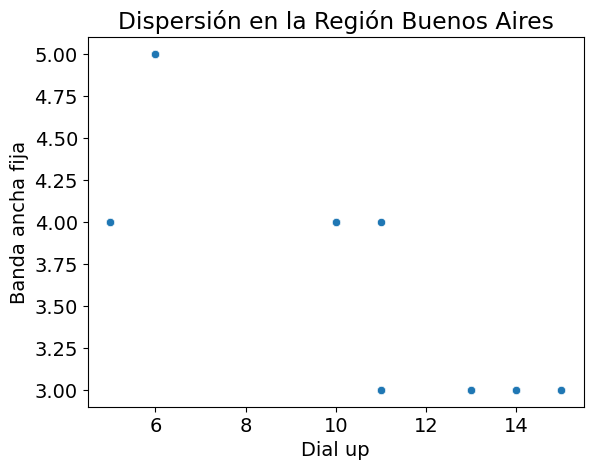

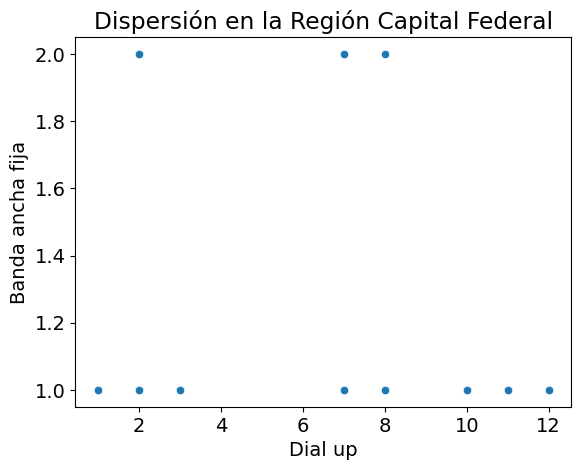

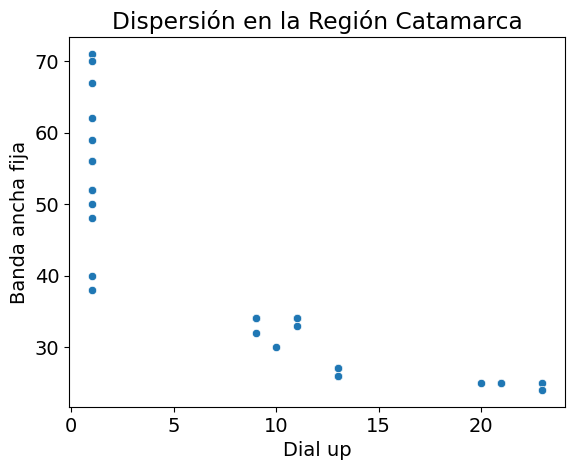

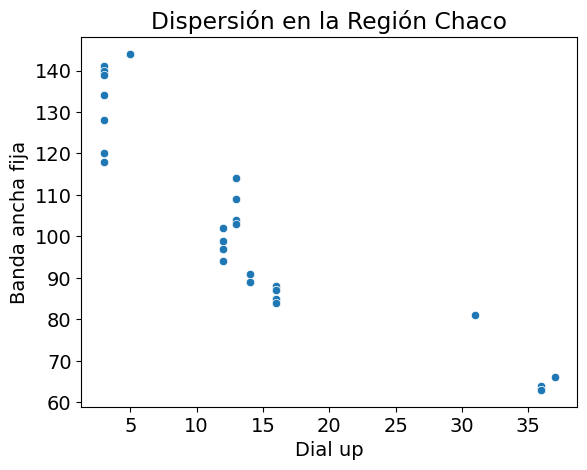

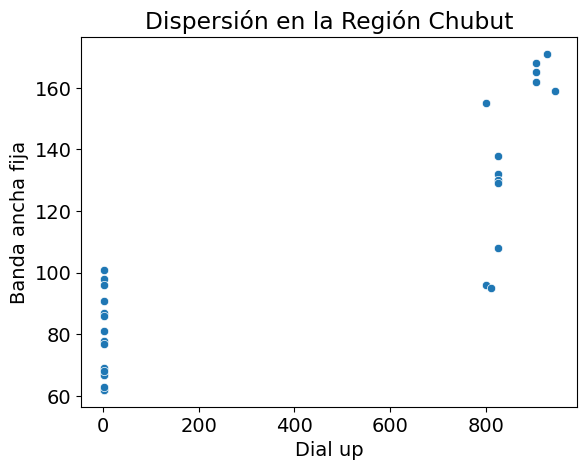

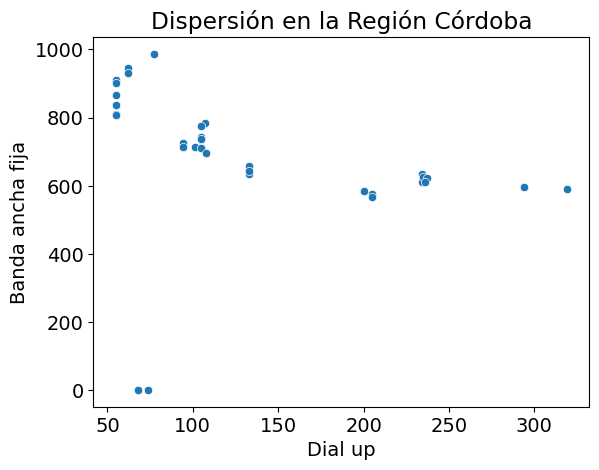

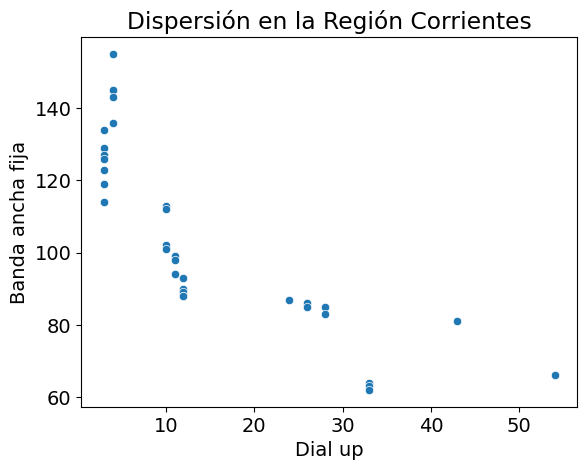

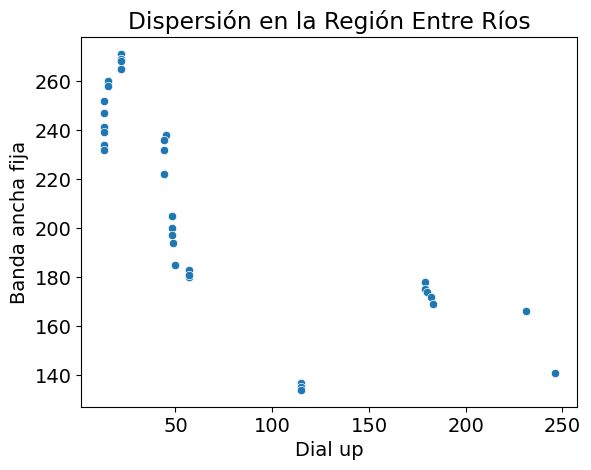

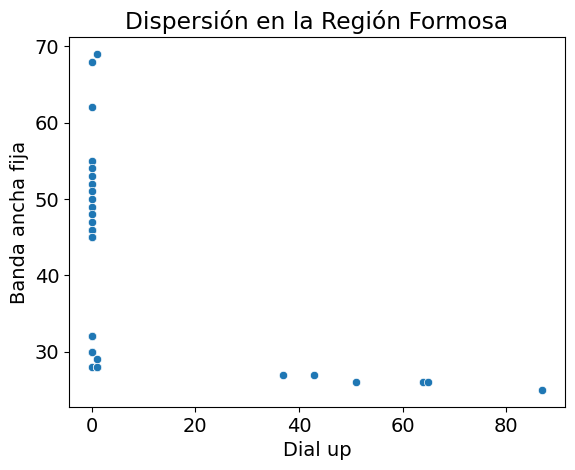

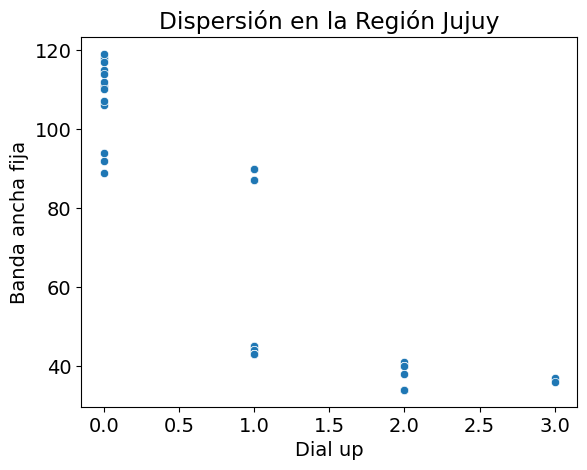

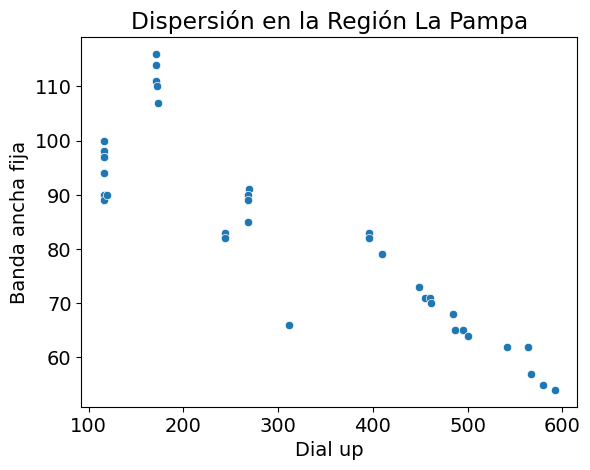

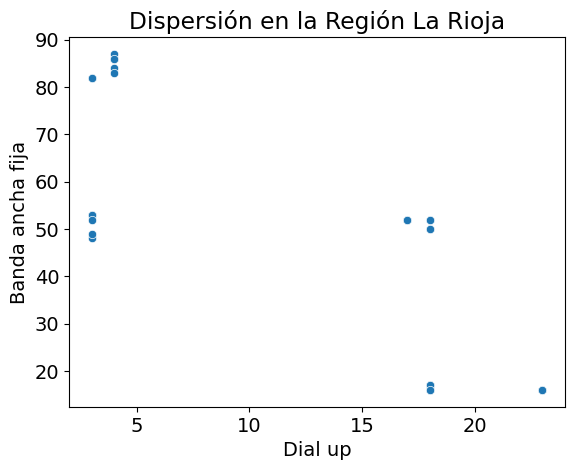

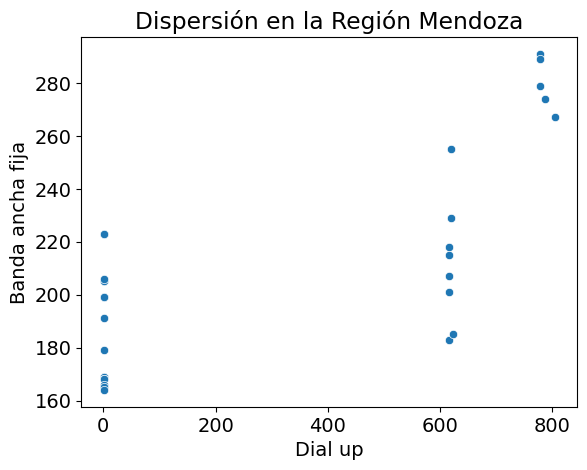

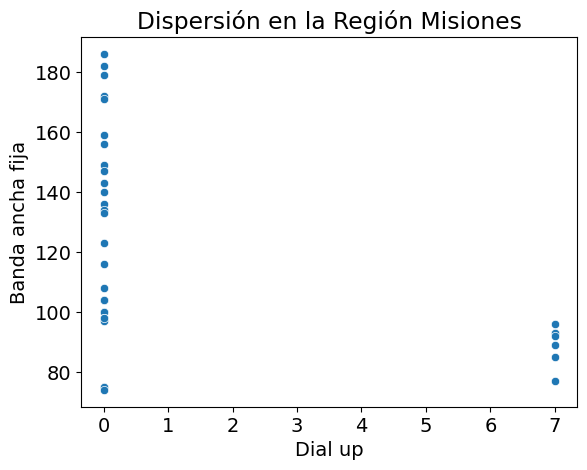

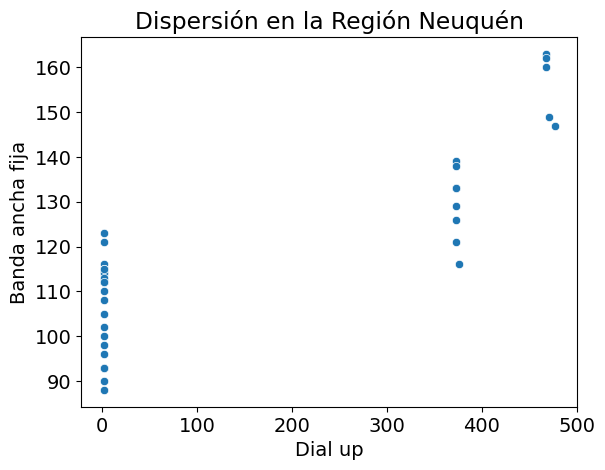

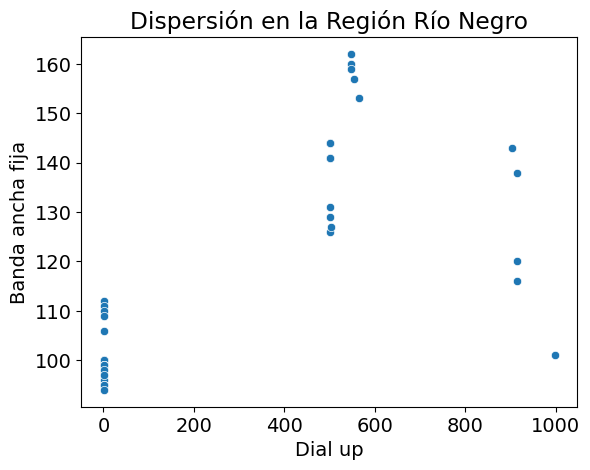

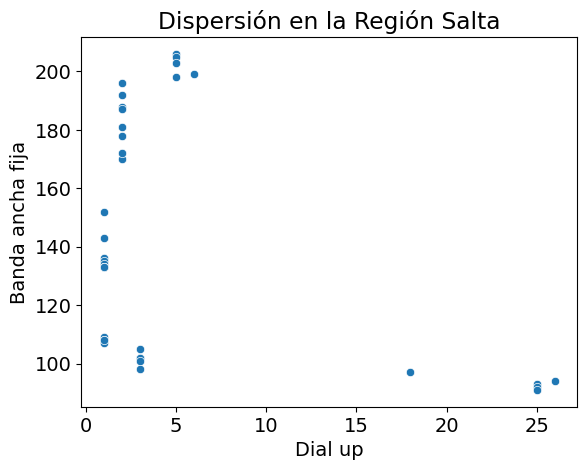

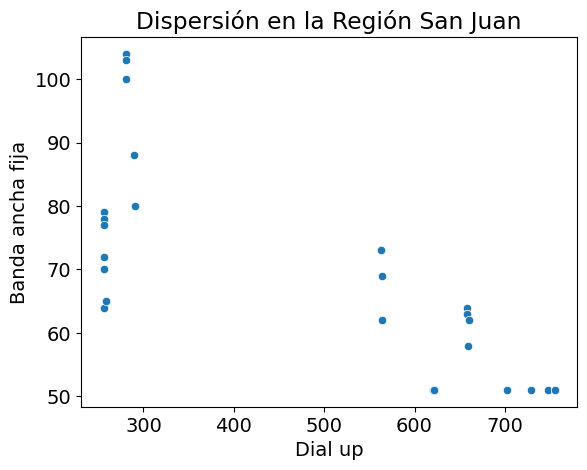

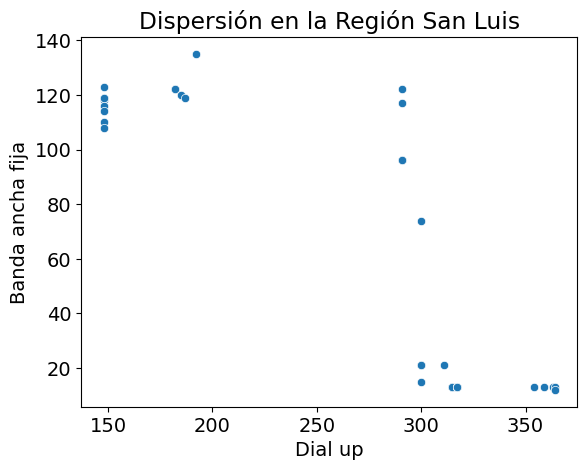

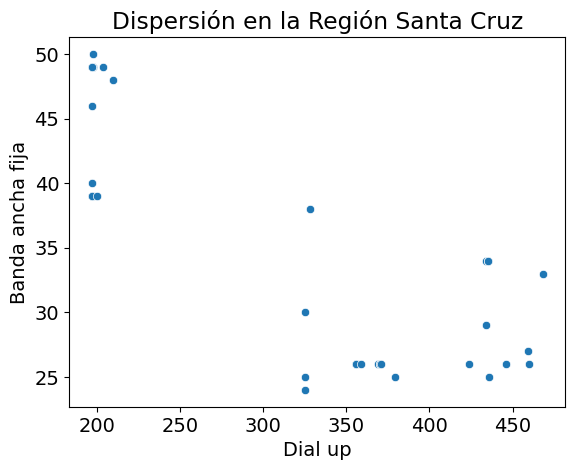

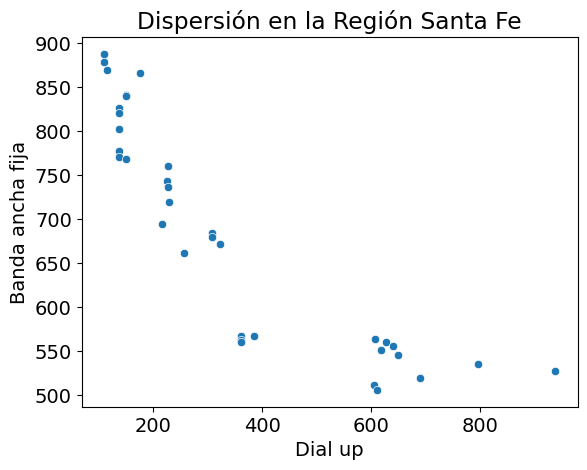

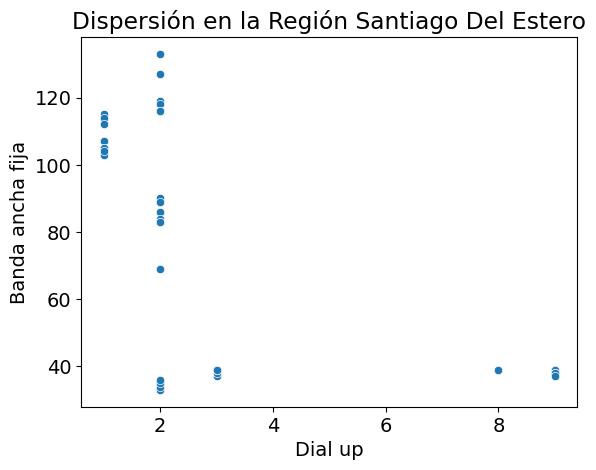

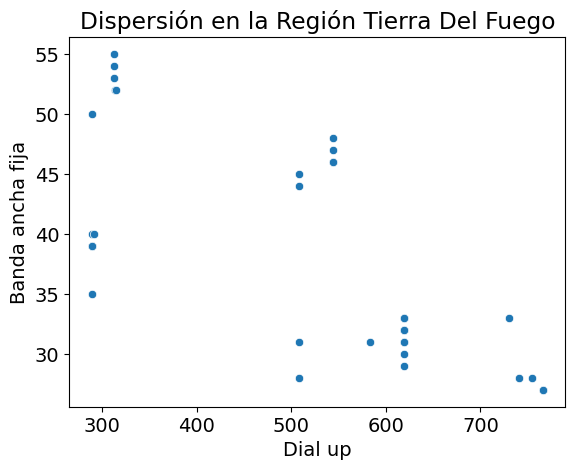

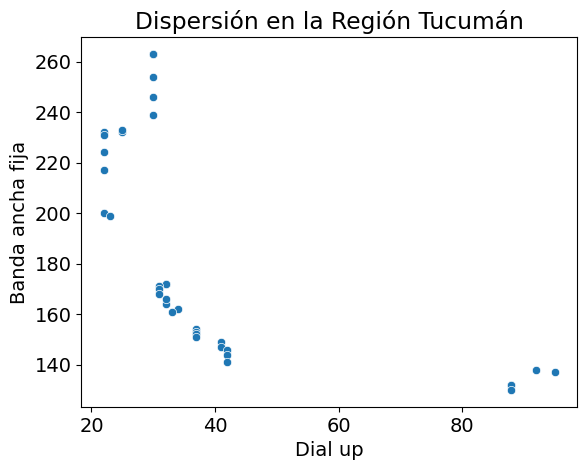

In [37]:
 # Segmentación de Datos #
regiones = df_2['Provincia'].unique()

# Iteración sobre cada Provincia y realiza un análisis específico para cada una
for region in regiones:
    segmento = df_2[df_2['Provincia'] == region]
    
    # Análisis específico para cada segmento, mediante gráfico de dispersión
    sns.scatterplot(x='Dial up', y='Banda ancha fija', data=segmento)
    plt.title(f'Dispersión en la Región {region}')
    plt.show()



## Conclusiones:

1. **Resumen de Datos Generales:**
   - El DataFrame tiene 864 entradas y 6 columnas.
   - La columna 'Dial up' tiene dos valores nulos.
   - La media de 'Dial up' es de 150.60, con una desviación estándar de 230.17.
   - La media de 'Banda ancha fija' es de 137.47, con una desviación estándar de 180.99.

2. **Comparativa entre 'Banda ancha fija' y 'Dial up':**
   - Se observa mediante diagramas de caja que 'Banda ancha fija' generalmente tiene valores más bajos que 'Dial up', aunque ambos tienen algunas instancias de valores atípicos.

3. **Análisis por Provincia:**
   - Se calcula la media de 'Dial up' y 'Banda ancha fija' para cada provincia.
   - Se observan variaciones significativas en las medias entre provincias, lo que indica disparidades en el acceso a servicios de internet entre regiones.

4. **Análisis Temporal de 'Banda ancha fija' por Provincia:**
   - Se realiza una tabla pivote para mostrar la media de 'Banda ancha fija' para cada provincia en diferentes años.
   - Muestra cómo ha evolucionado el acceso a banda ancha fija en cada provincia a lo largo de los años.

5. **Matriz de Correlación:**
   - Se calcula la matriz de correlación para las variables numéricas ('Dial up' y 'Banda ancha fija').
   - La matriz de correlación y su mapa de calor indican la relación entre estas variables. Se observa que no hay una correlación fuerte entre ellas.

6. **Segmentación de Datos:**
   - Se realiza un análisis de dispersión para 'Dial up' y 'Banda ancha fija' en cada provincia por separado.
   - Permite visualizar las relaciones específicas entre estas variables para cada provincia.

**Conclusiones Generales:**
- Existen diferencias notables en el acceso a servicios de internet entre provincias.
- La correlación entre 'Dial up' y 'Banda ancha fija' no es significativa, lo que sugiere que no están fuertemente relacionadas.
- El análisis temporal muestra cómo ha evolucionado el acceso a banda ancha fija en diferentes provincias a lo largo de los años.

Estas conclusiones brindan información valiosa para comprender la situación actual y las tendencias a lo largo del tiempo en cuanto al acceso a servicios de internet en diferentes regiones.

**Lectura y revisión de datos - 'Histórico velocidad Internet media'**

*EDA Y ETL*


In [103]:
df_velocidad=pd.read_csv('historico_velocidad_internet_media.csv')
df_velocidad.head(5)

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.000
1,2022,4,Capital Federal,18.286
2,2022,4,Catamarca,8.333
3,2022,4,Chaco,10.402
4,2022,4,Chubut,1.592


In [104]:
df_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     864 non-null    int64  
 1   Trimestre               864 non-null    int64  
 2   Provincia               864 non-null    object 
 3   Mbps (Media de bajada)  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


In [105]:
# Cambio nombre en columna

df_velocidad = df_velocidad.rename(columns={'Mbps (Media de bajada)': 'Velocidad_Media'})
df_velocidad.head(5)


,Año,Trimestre,Provincia,Velocidad_Media
0,2022,4,Buenos Aires,111.000
1,2022,4,Capital Federal,18.286
2,2022,4,Catamarca,8.333
3,2022,4,Chaco,10.402
4,2022,4,Chubut,1.592


In [98]:
# # Convertir a variables categóricas

# df_velocidad = pd.DataFrame({
#     'Provincia': ['Buenos Aires', 'Catamarca', 'Chaco', 'Chubut', 'Córdoba'],
#     'Accesos': [78.94, 65.77, 43.62, 85.57, 89.03]
# })

# # Convertir la columna 'Provincia' a categórica
# df_velocidad['Provincia'] = df_velocidad['Provincia'].astype('category')

# # Mostrar información sobre el DataFrame después de la conversión
# print(df_velocidad.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Provincia  5 non-null      category
 1   Accesos    5 non-null      float64 
dtypes: category(1), float64(1)
memory usage: 389.0 bytes
None


In [106]:
# Verificar si hay valores nulos en todo el DataFrame
valores_nulos = df_velocidad.isnull().any().any()

if valores_nulos:
    print("¡Hay valores nulos en el DataFrame!")
    # Muestra la cantidad de valores nulos por columna
    print(df_velocidad.isnull().sum())
else:
    print("No hay valores nulos en el DataFrame.")

No hay valores nulos en el DataFrame.


En base al analisis estádistico proporcionado por 'describe' 

In [107]:
df_velocidad.describe()

,Año,Trimestre,Velocidad_Media
count,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,302.410067
std,2.583484,1.118682,287.314571
min,2014.000000,1.000000,1.000000
25%,2016.000000,1.750000,2.808500
50%,2018.000000,2.500000,344.000000
75%,2020.000000,3.250000,520.250000
max,2022.000000,4.000000,988.000000


- ¿Cuál es la velocidad promedio de bajada en Mbps para todas las provincias y trimestres?

*Respuesta:* La velocidad promedio de bajada es aproximadamente 72.59 Mbps.

- ¿Cómo se distribuyen las velocidades de bajada en términos de cuartiles?

*Respuesta:* El 25% de las velocidades de bajada están por debajo de 65.77 Mbps, el 50% están por debajo de 78.94 Mbps, y el 75% están por debajo de 85.57 Mbps.

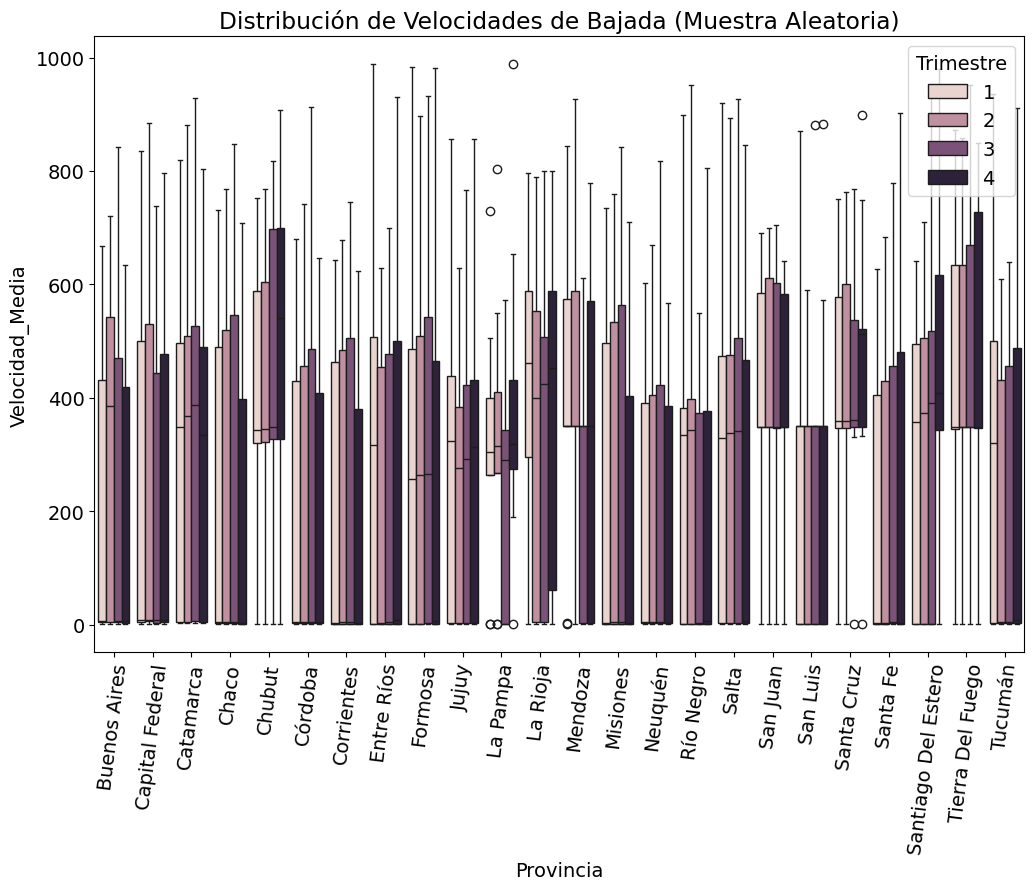

In [108]:
# Para visualizar y comprender mejor la distribución de las velocidades de bajada en Mbps para 
# cada provincia y trimestre, se realiza la visualización en gráfico de cajas. 

# Gráfico de caja con muestra aleatoria
plt.figure(figsize=(12, 8))
sns.boxplot(x='Provincia', y='Velocidad_Media', hue='Trimestre', data=df_velocidad)
plt.title('Distribución de Velocidades de Bajada (Muestra Aleatoria)')
plt.xticks(rotation=83)
plt.show()



**Conclusiones**

1. **Variabilidad en las Velocidades de Bajada:**
   - Se observa una amplia variabilidad en las velocidades de bajada en las diferentes provincias y trimestres, como se evidencia en la extensión de los bigotes en el gráfico de caja.

2. **Diferencias Regionales:**
   - Algunas provincias, como Tucumán, Chaco y Misiones, presentan velocidades más altas, superando los 600 en algunos casos, especialmente en el primer, tercer y cuarto trimestre. Esto sugiere una posible mejora en la infraestructura de red en estas regiones.

3. **Provincias con Velocidades Constantes:**
   - Provincias como Tierra del Fuego, Río Negro, Salta, Santa Cruz, San Luis, La Pampa y Mendoza parecen mantener velocidades relativamente constantes, sin valores atípicos significativos.

4. **Valores Atípicos:**
   - Se identifican valores atípicos en varias provincias y trimestres, indicando posibles interrupciones o eventos inusuales en la calidad del servicio. Específicamente, Salta, Santa Fe, Buenos Aires, La Pampa, Córdoba y Santa Cruz presentan valores atípicos en el cuarto trimestre.

5. **Posibles Problemas de Calidad de Servicio:**
   - Las provincias con valores atípicos podrían enfrentar problemas de calidad de servicio durante ciertos períodos, lo que podría deberse a eventos climáticos, mantenimiento de la red o aumentos inesperados en la demanda.

6. **Necesidad de Investigación Adicional:**
   - Se recomienda una investigación más detallada para comprender las causas exactas de los valores atípicos y evaluar la consistencia de los datos en provincias con velocidades 0.

7. **Importancia del Contexto Local:**
   - Es crucial considerar el contexto local y eventos regionales al interpretar estos datos. Factores externos, como condiciones climáticas o inversiones en infraestructura, pueden tener un impacto significativo.

8. **Comunicación y Acciones Correctivas:**
   - La información debe comunicarse a las autoridades relevantes y proveedores de servicios de Internet para tomar medidas correctivas y mejorar la calidad del servicio en áreas identificadas con problemas.

En resumen, el análisis destaca la necesidad de una gestión proactiva de la infraestructura de red para garantizar una experiencia de usuario consistente y de alta calidad en todas las provincias.



In [109]:
#  Guardar el DataFrame con las velocidades de internet para su posterior análisis de KPIs
df_velocidad.to_csv('historico_velocidad_internet_media_nuevo.csv')

**Lectura y revisión de datos - 'Accesos a internet por tecnología'**

*EDA Y ETL*

In [ ]:
df_tecnologia =pd.read_csv('Internet_Accesos-por-tecnologia.csv')
df_tecnologia.head(195)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,326,3,1,130,72,5
1,2022,4,Capital Federal,139,1,139,5,32,2
2,2022,4,Catamarca,9,11,47,1,2,71
3,2022,4,Chaco,25,61,47,8,3,144
4,2022,4,Chubut,45,74,10,31,9,169
...,...,...,...,...,...,...,...,...,...
190,2021,1,Tierra Del Fuego,13,27,6,0,316,40
191,2021,1,Tucumán,147,12,70,2,740,232
192,2020,4,Buenos Aires,636,2,805,93,58,4
193,2020,4,Capital Federal,163,1,40,5,29,1


In [ ]:
# Mostrar solo las filas donde al menos una columna tenga un valor igual a 0
result = df_tecnologia[df_tecnologia.eq(0).any(axis=1)]
result

In [ ]:
df_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           864 non-null    int64 
 1   Trimestre     864 non-null    int64 
 2   Provincia     864 non-null    object
 3   ADSL          864 non-null    int64 
 4   Cablemodem    864 non-null    int64 
 5   Fibra óptica  864 non-null    int64 
 6   Wireless      864 non-null    int64 
 7   Otros         864 non-null    int64 
 8   Total         864 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 60.9+ KB


In [ ]:
# Conversión de tipo de datos
df_tecnologia['Año'] = df_tecnologia['Año'].astype('int')
df_tecnologia['Trimestre'] = df_tecnologia['Trimestre'].astype('int')
df_tecnologia['Provincia'] = df_tecnologia['Provincia'].astype('str')
df_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           864 non-null    int32 
 1   Trimestre     864 non-null    int32 
 2   Provincia     864 non-null    object
 3   ADSL          864 non-null    int64 
 4   Cablemodem    864 non-null    int64 
 5   Fibra óptica  864 non-null    int64 
 6   Wireless      864 non-null    int64 
 7   Otros         864 non-null    int64 
 8   Total         864 non-null    int64 
dtypes: int32(2), int64(6), object(1)
memory usage: 54.1+ KB


In [ ]:
df_tecnologia.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,86.363426,103.291667,165.432870,57.777778,102.712963,137.636574
std,2.583484,1.118682,116.431490,188.849172,266.807807,156.015038,207.418981,180.798813
min,2014.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2016.000000,1.750000,21.000000,9.000000,9.000000,4.000000,3.000000,39.750000
50%,2018.000000,2.500000,46.000000,35.500000,25.000000,10.000000,15.000000,91.000000
75%,2020.000000,3.250000,81.000000,72.250000,170.750000,26.000000,47.000000,143.250000
max,2022.000000,4.000000,720.000000,999.000000,998.000000,952.000000,987.000000,987.000000


**Análisis y Conclusiones:**

1. **Año y Trimestre:**
   - Los datos abarcan un período de 2014 a 2022, distribuidos en trimestres. Esto proporciona una visión a lo largo del tiempo de los diferentes tipos de conexiones a Internet.

2. **Cantidad de Conexiones por Tipo:**
   - Se presentan cinco tipos de conexiones a Internet: ADSL, Cablemodem, Fibra óptica, Wireless y Otros.
   - La conexión más común parece ser la Fibra óptica, seguida de cerca por Cablemodem y ADSL.
   - La conexión menos común es Wireless.

3. **Promedio y Desviación Estándar:**
   - El promedio y la desviación estándar indican la tendencia central y la dispersión de los datos.
   - La conexión Wireless muestra una desviación estándar relativamente alta, lo que sugiere una variabilidad significativa en la cantidad de conexiones inalámbricas en comparación con otras.

4. **Mínimos y Máximos:**
   - Los valores mínimos indican la menor cantidad registrada para cada tipo de conexión, mientras que los máximos representan los picos máximos observados.
   - La conexión Cablemodem tiene un valor mínimo de 0, lo que podría ser un dato atípico o un área geográfica donde no se utiliza este tipo de conexión.
   - La conexión con la cantidad máxima más alta es Cablemodem.

5. **Estadísticas Cuantiles (Percentiles 25%, 50%, 75%):**
   - Estas estadísticas proporcionan información sobre la distribución de los datos.
   - El 50% de las observaciones para la Fibra óptica están por debajo de 25, lo que indica que la mitad de los datos de Fibra óptica son relativamente bajos.
   - El percentil 75 para Wireless es significativamente menor en comparación con otras conexiones, sugiriendo que la mayoría de las áreas tienen una cantidad relativamente baja de conexiones inalámbricas.

6. **Conclusión General:**
   - La Fibra óptica es la conexión más común y parece tener una distribución más uniforme según las estadísticas cuantiles.
   - La conexión Wireless muestra una mayor variabilidad y, en general, es menos común según las estadísticas proporcionadas.
   - La conexión Cablemodem puede tener áreas o momentos con 0 conexiones, lo que podría ser un área de mejora o un área geográfica específica.

Este análisis proporciona una visión general de la distribución y variabilidad de las conexiones a Internet a lo largo del tiempo, permitiendo identificar áreas de enfoque y oportunidades de mejora.

In [ ]:
# Analisis de distribución de conexiones de la provincia de Córdoba

df_cordoba = df_tecnologia[df_tecnologia['Provincia'] == 'Córdoba']

# Seleccionar solo las columnas relevantes para la distribución
columnas_tipos_conexion = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
df_tipos_conexion = df_cordoba[columnas_tipos_conexion]

# Calcular la suma de conexiones para cada tipo
suma_por_tipo = df_tipos_conexion.sum()

# Crear un DataFrame con la distribución
distribucion_tipos = pd.DataFrame({
    'Tipo de Conexión': suma_por_tipo.index,
    'Cantidad': suma_por_tipo.values
})

# Ordenar los resultados
distribucion_tipos = distribucion_tipos.sort_values(by='Cantidad', ascending=False)


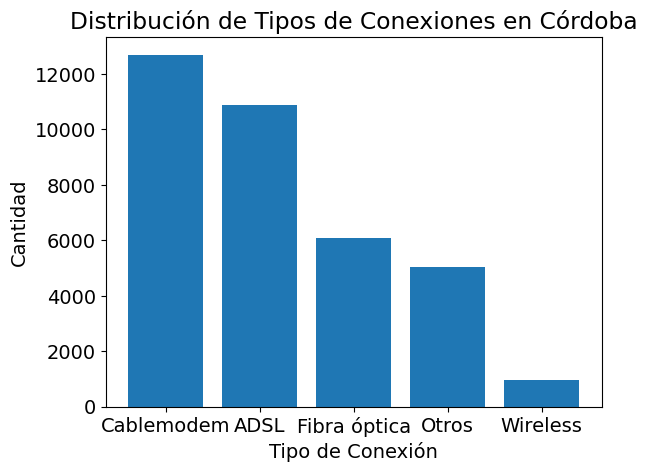

In [ ]:
plt.bar(distribucion_tipos['Tipo de Conexión'], distribucion_tipos['Cantidad'])
plt.xlabel('Tipo de Conexión')
plt.ylabel('Cantidad')
plt.title('Distribución de Tipos de Conexiones en Córdoba')
plt.show()

In [ ]:
# Calular la velocidad promedio en la provincia de Córdoba. 
# Los datos de tecnología y velocidad se encuentran en diferentes Dataframe, utilizaremos MERGE para unirlos. 

# Cargar el DataFrame de distribución de conexiones
df_tecnologia = pd.read_csv('Internet_Accesos-por-tecnologia.csv') 

# Filtrar datos para la provincia de Córdoba en df_tipos_conexion
df_cordoba = df_tecnologia[df_tecnologia['Provincia'] == 'Córdoba']

# Cargar el DataFrame de velocidad
df_velocidad = pd.read_csv('historico_velocidad_internet_media_nuevo.csv')  

# Filtrar datos para la provincia de Córdoba en df_velocidad
df_cordoba_velocidad = df_velocidad[df_velocidad['Provincia'] == 'Córdoba']

# Unir los DataFrames por las columnas 'Año', 'Trimestre'
df_cordoba_combinado = pd.merge(df_cordoba, df_cordoba_velocidad, on=['Año', 'Trimestre'])

# Convertir las columnas relevantes a tipo numérico
cols_numericas = ['Velocidad_Media', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

df_cordoba_combinado[cols_numericas] = df_cordoba_combinado[cols_numericas].apply(pd.to_numeric, errors='coerce')

# Calcular la velocidad total por tipo de conexión
df_cordoba_combinado['Velocidad_total'] = df_cordoba_combinado['Velocidad_Media'] * (
    df_cordoba_combinado['ADSL'] + df_cordoba_combinado['Cablemodem'] + df_cordoba_combinado['Fibra óptica'] +
    df_cordoba_combinado['Wireless'] + df_cordoba_combinado['Otros']
)

# Calcular la velocidad promedio
velocidad_promedio = df_cordoba_combinado['Velocidad_total'].sum() / df_cordoba_combinado[cols_numericas].sum().sum()

print(f'Velocidad promedio en Córdoba (sin valores extremadamente altos): {velocidad_promedio:.2f} Mbps')



Velocidad promedio en Córdoba (sin valores extremadamente altos): 204.40 Mbps


In [ ]:
# Calcular la cobertura por tipo de conexión:

df_cordoba['Cobertura_ADSL'] = df_cordoba['ADSL'] / df_cordoba['Total'] * 100
df_cordoba['Cobertura_Cablemodem'] = df_cordoba['Cablemodem'] / df_cordoba['Total'] * 100
df_cordoba['Cobertura_Fibra_optica'] = df_cordoba['Fibra óptica'] / df_cordoba['Total'] * 100
df_cordoba['Cobertura_Wireless'] = df_cordoba['Wireless'] / df_cordoba['Total'] * 100
df_cordoba['Cobertura_Otros'] = df_cordoba['Otros'] / df_cordoba['Total'] * 100
print(df_cordoba[['Cobertura_ADSL', 'Cobertura_Cablemodem', 'Cobertura_Fibra_optica', 'Cobertura_Wireless', 'Cobertura_Otros']])



     Cobertura_ADSL  Cobertura_Cablemodem  Cobertura_Fibra_optica  \
5      15200.000000          45700.000000            36700.000000   
29     16400.000000          46500.000000            33900.000000   
53     17900.000000          46800.000000            30900.000000   
77     19600.000000          50200.000000            23600.000000   
101       21.479230             49.341439               21.985816   
125       24.181626             50.369588               17.634636   
149       25.778733             50.268528               16.326531   
173       28.540066             48.847420               14.818880   
197       29.568106             48.615725               13.953488   
221       31.833910             49.711649               11.764706   
245       33.851675             49.641148               10.287081   
269       35.265105             50.061652                8.508015   
293       36.802974             50.805452                6.567534   
317       39.335888             50

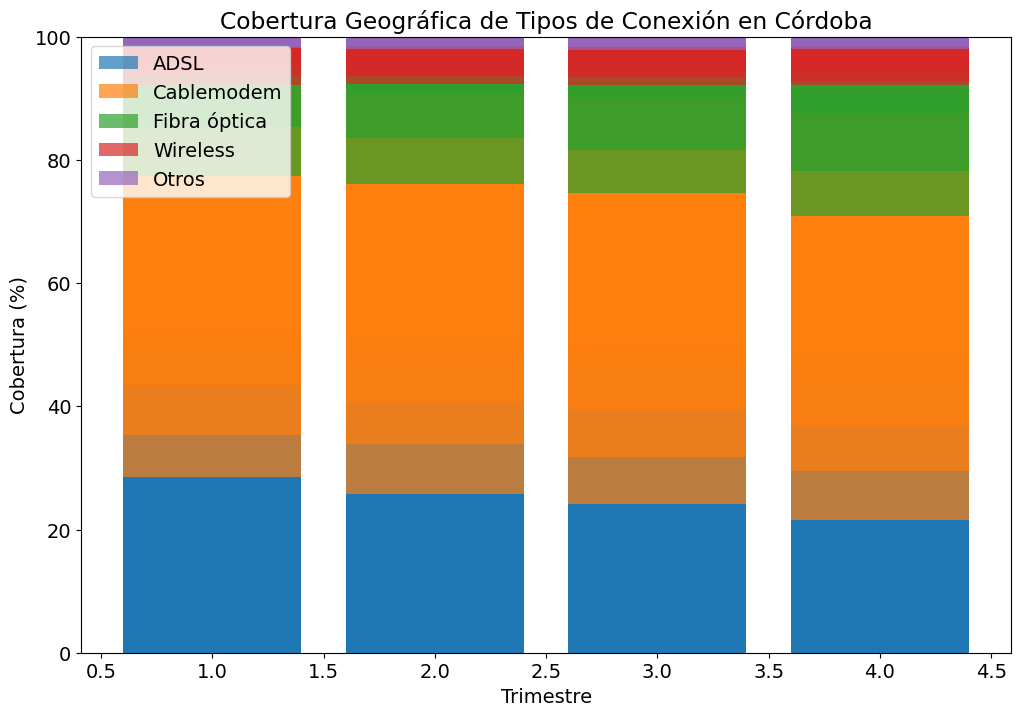

In [ ]:
#Grafico la cobertura por tipo de conexión 

plt.figure(figsize=(12, 8))

# Altura inicial para cada tipo de conexión
bottom_adsl = np.zeros(len(df_cordoba))
bottom_cablemodem = df_cordoba['Cobertura_ADSL']
bottom_fibra_optica = bottom_cablemodem + df_cordoba['Cobertura_Cablemodem']
bottom_wireless = bottom_fibra_optica + df_cordoba['Cobertura_Fibra_optica']
bottom_otros = bottom_wireless + df_cordoba['Cobertura_Wireless']

plt.bar(df_cordoba['Trimestre'], df_cordoba['Cobertura_ADSL'], label='ADSL', alpha=0.7, bottom=bottom_adsl)
plt.bar(df_cordoba['Trimestre'], df_cordoba['Cobertura_Cablemodem'], label='Cablemodem', alpha=0.7, bottom=bottom_cablemodem)
plt.bar(df_cordoba['Trimestre'], df_cordoba['Cobertura_Fibra_optica'], label='Fibra óptica', alpha=0.7, bottom=bottom_fibra_optica)
plt.bar(df_cordoba['Trimestre'], df_cordoba['Cobertura_Wireless'], label='Wireless', alpha=0.7, bottom=bottom_wireless)
plt.bar(df_cordoba['Trimestre'], df_cordoba['Cobertura_Otros'], label='Otros', alpha=0.7, bottom=bottom_otros)

plt.title('Cobertura Geográfica de Tipos de Conexión en Córdoba')
plt.xlabel('Trimestre')
plt.ylabel('Cobertura (%)')
plt.legend(loc='upper left')
plt.ylim(0, 100) 
plt.show()


**Conclusiones sobre cobertura Geográfica de tipos de conexión en Córdoba** 

El conjunto de datos proporciona información sobre la cobertura de diferentes tecnologías de conexión (ADSL, Cablemódem, Fibra óptica, Dial-up, Otros) en diferentes momentos o áreas representadas por las filas. A continuación, se realiza un análisis de los resultados:

1. **Tendencias Temporales:**
   - Las columnas representan diferentes tecnologías de conexión, y las filas representan momentos o áreas.
   - Se observa una disminución en la cobertura de tecnologías como ADSL, Cablemódem y Fibra óptica de las, esto podría indicar cambios temporales o variaciones en la cobertura.

2. **Análisis de Dial-up y Otros:**
   - La cobertura de Dial-up y Otros parece ser baja en comparación con las tecnologías más avanzadas.
   - Dial-up y Otros muestran una tendencia a disminuir.

3. **Cambio en la Distribución de Cobertura:**
   - Las últimas filas muestran un aumento en la cobertura de Dial-up y Otros, mientras que las tecnologías más avanzadas (ADSL, Cablemódem, Fibra óptica) disminuyen.
   - Esto podría indicar cambios en las estrategias de cobertura o en la preferencia de tecnologías en el tiempo.

4. **Porcentaje de Cobertura:**
   - Las columnas "Porcentaje Cobertura" representan el porcentaje de cobertura total para cada momento o área.
   - El porcentaje de cobertura total parece mantenerse relativamente estable, aunque hay fluctuaciones.

5. **Conclusión:**
  
   - Se Consideran factores externos como cambios en la demanda, inversiones en infraestructura y avances tecnológicos que  influyeron en la distribución de la cobertura.
